# Carvana
<br>
Carvana is a start-up business. Its goal is to completely change the way people buy, finance, and trade their used vehicles by replacing physical infrastructure with technology and top of the line scientific models. The challenge is to predict if the car purchased at the Auction is a Kick (bad buy).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv('data/carvana.csv').set_index('RefId')
print(f"Dimenzije skupa podataka: {df.shape}")
df.head()

Dimenzije skupa podataka: (6798, 33)


,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
RefId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1/7/2009 0:12,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,0
2,1/7/2009 0:12,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,0
3,1/7/2009 0:12,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,0
4,1/7/2009 0:12,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,WHITE,AUTO,2.0,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,3901.0,4908.0,6706.0,8577.0,4709.0,5827.0,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594,0
5,1/21/2009 0:12,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,76173,AMERICAN,LARGE TRUCK,CHRYSLER,6407.0,8051.0,10378.0,12443.0,7159.0,8934.0,11135.0,12560.0,NaN,NaN,19638,33619,FL,8800.0,0,920,0


In [4]:
df.columns

Index(['PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'IsBadBuy'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6798 entries, 1 to 6798
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          6798 non-null   object 
 1   Auction                            2983 non-null   object 
 2   VehYear                            6798 non-null   int64  
 3   VehicleAge                         6798 non-null   int64  
 4   Make                               6798 non-null   object 
 5   Model                              6798 non-null   object 
 6   Trim                               6566 non-null   object 
 7   SubModel                           6798 non-null   object 
 8   Color                              6798 non-null   object 
 9   Transmission                       6798 non-null   object 
 10  WheelTypeID                        6515 non-null   float64
 11  WheelType                          6459 non-null   objec

## Eksploratorna analiza

In [6]:
df.isnull().sum()

PurchDate                               0
Auction                              3815
VehYear                                 0
VehicleAge                              0
Make                                    0
Model                                   0
Trim                                  232
SubModel                                0
Color                                   0
Transmission                            0
WheelTypeID                           283
WheelType                             339
VehOdo                                  0
Nationality                             1
Size                                    1
TopThreeAmericanName                    1
MMRAcquisitionAuctionAveragePrice       1
MMRAcquisitionAuctionCleanPrice         1
MMRAcquisitionRetailAveragePrice        1
MMRAcquisitonRetailCleanPrice           1
MMRCurrentAuctionAveragePrice          21
MMRCurrentAuctionCleanPrice            21
MMRCurrentRetailAveragePrice           21
MMRCurrentRetailCleanPrice        

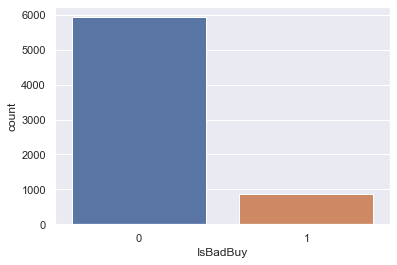

In [7]:
sns.countplot(x='IsBadBuy', data=df)

In [8]:
df[df['IsBadBuy'] == 0].shape[0]/df.shape[0]

0.872609591056193

Vidimo da imamo nebalansiranu klasu koju predviđamo. Znatno je više onih kupovina koje su se pokazale kao dobre. Procentulano, samo nešto malo više od 12% kupovina su označene kao loše. 

In [9]:
df.describe()

,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
count,6798.000000,6798.000000,6515.000000,6798.000000,6797.000000,6797.000000,6797.000000,6797.000000,6777.000000,6777.000000,6777.000000,6777.000000,6798.000000,6798.000000,6798.000000,6798.000000,6798.000000,6798.000000
mean,2005.332451,4.183142,1.490407,71499.390115,6153.684125,7405.387524,8517.821539,9880.576431,6152.180906,7418.757710,8786.704146,10168.581231,26244.618270,57898.912474,6759.792239,0.027067,1272.778758,0.127390
std,1.733395,1.719690,0.516856,14646.256617,2465.206950,2731.341954,3145.988442,3383.682106,2431.564892,2682.628698,3088.425185,3305.444219,25322.610147,26081.837405,1745.699606,0.162290,597.720416,0.333434
min,2001.000000,1.000000,1.000000,15249.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,2150.000000,0.000000,462.000000,0.000000
25%,2004.000000,3.000000,1.000000,62002.750000,4273.000000,5415.000000,6301.000000,7493.000000,4274.000000,5434.000000,6531.000000,7810.000000,17675.000000,30331.000000,5465.000000,0.000000,834.000000,0.000000
50%,2005.000000,4.000000,1.000000,73562.000000,6148.000000,7353.000000,8473.000000,9821.000000,6091.000000,7352.000000,8760.000000,10114.000000,19662.000000,74135.000000,6740.000000,0.000000,1169.000000,0.000000
75%,2007.000000,5.000000,2.000000,82551.750000,7774.000000,9014.000000,10626.000000,12083.000000,7720.000000,9014.000000,10884.000000,12308.000000,22808.000000,80022.000000,7935.000000,0.000000,1623.000000,0.000000
max,2009.000000,9.000000,3.000000,112029.000000,21611.000000,24015.000000,23840.000000,26436.000000,21837.000000,25847.000000,24084.000000,28415.000000,99761.000000,98064.000000,19000.000000,1.000000,6819.000000,1.000000


Raspon godina automobila se kreće između 1 i 9, i može se reći da godine podležu normalnoj raspodeli, kao i većina numeričkih atributa. Postoje neki automobili koji su prodati i za 0 dolara, što je upečatljivo, dok se najviše cene kreću između 20 i 30 hiljada. Trošak akvizicije je značajno veći od troška garancije.

In [10]:
df.describe(include= object)

,PurchDate,Auction,Make,Model,Trim,SubModel,Color,Transmission,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,VNST
count,6798,2983,6798,6798,6566,6798,6798,6798,6459,6797,6797,6797,339,339,1131
unique,503,2,32,632,104,465,16,2,2,4,12,4,2,2,2
top,1/30/2010 0:09,OTHER,CHEVROLET,PT CRUISER,Bas,4D SEDAN,SILVER,AUTO,Alloy,AMERICAN,MEDIUM,GM,NO,GREEN,FL
freq,42,1598,1574,216,1316,1449,1379,6547,3376,5639,2888,2328,324,326,983


Kada su u pitanju kategorički atributi, vidimo da imamo dosta nedostajućih podataka za Aukciju, a od poznatih više je onih gde ne znamo aukcijsku kuću. Najćešći brend je Chevrolet, boja srebrna, dok skoro svi automobili su automatik. Uglavnom se radi o automobilima americkog porekla, srednje veličine.

In [11]:
df[df['MMRAcquisitionAuctionAveragePrice']==0].shape[0]

69

Postoji 69 slučajeva automobila prodatih za 0 dolara.

In [12]:
columns_to_show = ['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRCurrentAuctionAveragePrice', 'VehBCost', 'WarrantyCost']
group_columns = ['IsBadBuy']
df.groupby(group_columns)[columns_to_show].agg(['count', np.mean, np.std])

VehicleAge                     VehOdo                             MMRAcquisitionAuctionAveragePrice                           MMRCurrentAuctionAveragePrice                           VehBCost                           WarrantyCost                         
              count      mean       std  count          mean           std                             count         mean          std                         count         mean          std    count         mean          std        count         mean         std
IsBadBuy                                                                                                                                                                                                                                                               
0              5932  4.080748  1.689940   5932  71096.697404  14731.186406                              5931  6253.233013  2444.210077                          5912  6247.371448  2413.101570     5932  6831.761548  1717.473833         5932  1261.261969  582.464996
1               866  4.884527  1.758367    866  74257.788684  13744.952600                               866  5471.900693  2501.526796                           865  5501.583815  2458.767822      866  6266.810785  1855.370683          866  1351.667436  688.470133

Kada pogledamo ove atribute možemo zaključiti da postoji određena razlika između automobila koji su bili loša kupovina i onih koji nisu u cenama i trošku. Prosek cena je niži kod automobila koji su se kasnije pokazali kao kick, dok je trošak veći. Ovo možemo predstaviti i preko grafika:

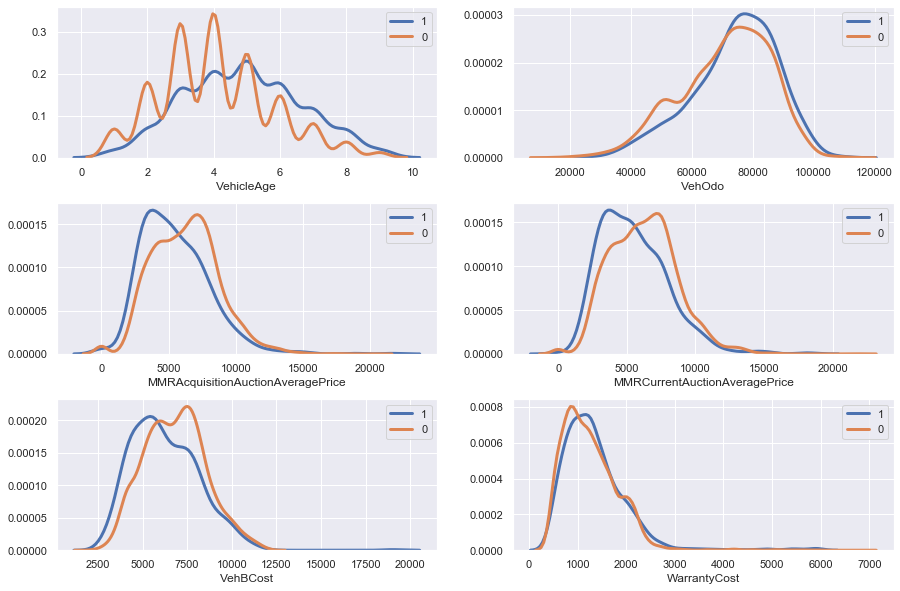

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
fig.subplots_adjust(hspace=0.3)
hue = [1,0]
for ax, catplot in zip(axes.flatten(), df[columns_to_show].columns):
    for h in hue:
        subset = df[df['IsBadBuy'] == h]
        sns.distplot(subset[catplot], ax = ax, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = h)

Još možemo dodati kako većina atributa ima približno normalnu raspodelu, samo se kao što je gore navedeno razlikuje pozicija srednje vrednosti.

In [14]:
pd.crosstab(df['Make'], df['IsBadBuy']).apply(lambda r: r/r.sum(), axis=1)

IsBadBuy,0,1
Make,,
ACURA,0.500000,0.500000
BUICK,0.809524,0.190476
CADILLAC,1.000000,0.000000
CHEVROLET,0.900889,0.099111
CHRYSLER,0.863362,0.136638
DODGE,0.886268,0.113732
FORD,0.846081,0.153919
GMC,0.885246,0.114754
HONDA,0.884615,0.115385


Na prvi pogled možemo reći da je model automobila veoma informativan atribut i da će biti od značaja za predikciju, međutim zbog toga što su neki modeli u 100% slučajeva bili dobri postoji mogućnost da ih je veoma malo, te to treba proveriti.

In [15]:
df["Make"].value_counts()

CHEVROLET     1574
DODGE         1187
FORD          1059
CHRYSLER       827
PONTIAC        395
KIA            232
SATURN         211
NISSAN         195
HYUNDAI        181
JEEP           150
SUZUKI         132
MAZDA          112
TOYOTA         109
MITSUBISHI      97
MERCURY         81
BUICK           63
GMC             61
HONDA           52
OLDSMOBILE      22
VOLKSWAGEN      14
ISUZU            8
LINCOLN          7
INFINITI         6
MINI             5
SCION            5
ACURA            4
VOLVO            4
PLYMOUTH         1
HUMMER           1
LEXUS            1
SUBARU           1
CADILLAC         1
Name: Make, dtype: int64

I kao što je pretpostavljeno, većina modela sa procentom 100% uglavnom ima po 1 automobil i zbog toga je takav rezultat.

Izdvojićemo kategoričke atribute kako bismo pogledali uticaj pripadnosti određenoj kategoriji na krajnji ishod.

In [16]:
categorical = ['Auction', 'Color', 'Transmission', 'WheelType','Nationality', 'Size', 'TopThreeAmericanName']

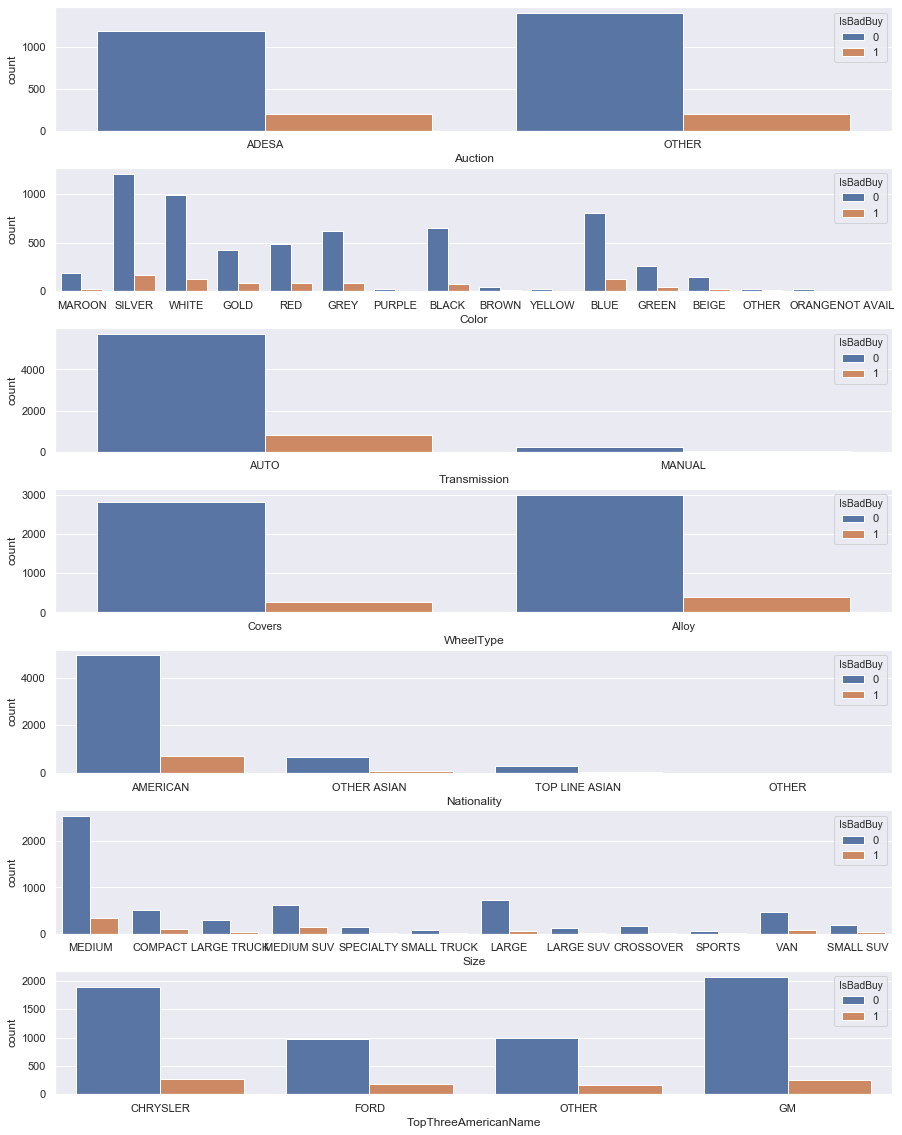

In [17]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15,20))
fig.subplots_adjust(hspace=0.3)
for ax, catplot in zip(axes.flatten(), df[categorical].columns):
     sns.countplot(x=catplot, hue = 'IsBadBuy', data=df, ax=ax)

Iz ovih grafika možemo zaključiti da nijedan od atributa neće u nekoj veoma značajnoj meri uticati na krajnji ishod, ali takođe vidimo da postoje određene razlike u odnosima za pojedine grupe što može kasnije uticati na model.

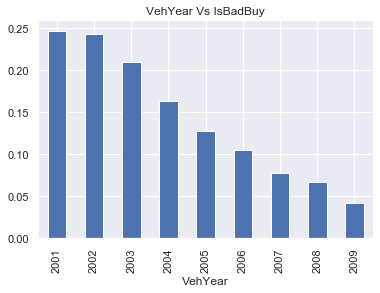

In [18]:
df.groupby("VehYear").mean()["IsBadBuy"].plot.bar(title = "VehYear Vs IsBadBuy")
plt.show()

Automobili koji su se pokazali kao kick su uglavnom stariji, kao što možemo videti, te ovaj atribut može biti od značaja.

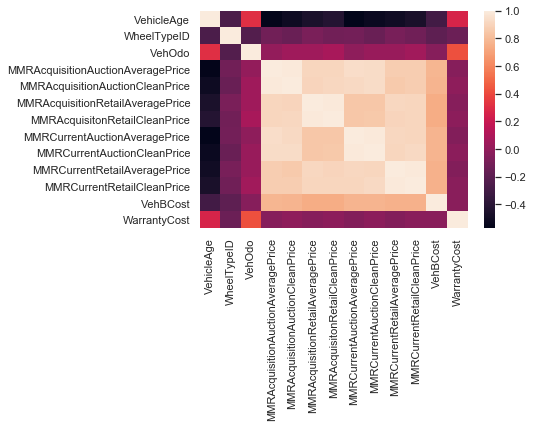

In [19]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
numeric_df = df.select_dtypes(include=numerics)
numeric_df.drop(columns = ["IsBadBuy", 'BYRNO', 'IsOnlineSale', 'VNZIP1', 'VehYear'], inplace = True)
corr_matrix = numeric_df.corr(method='pearson') 

sns.heatmap(corr_matrix)

Kada pogledamo korelaciju između atributa, očekivano visoka je korelacija između cena, što se moglo videti i u samom startu iz podataka. Takođe, vidimo izuzetno negativnu korelaciju između cene i godišta automobila, kao i pozitivnu između godišta i pređene kilometraže. Za ostale varijable uglavnom ne ma značajne korelacije, osim povezanosti troška sa kilometražom i godištem što je opet očekivano.

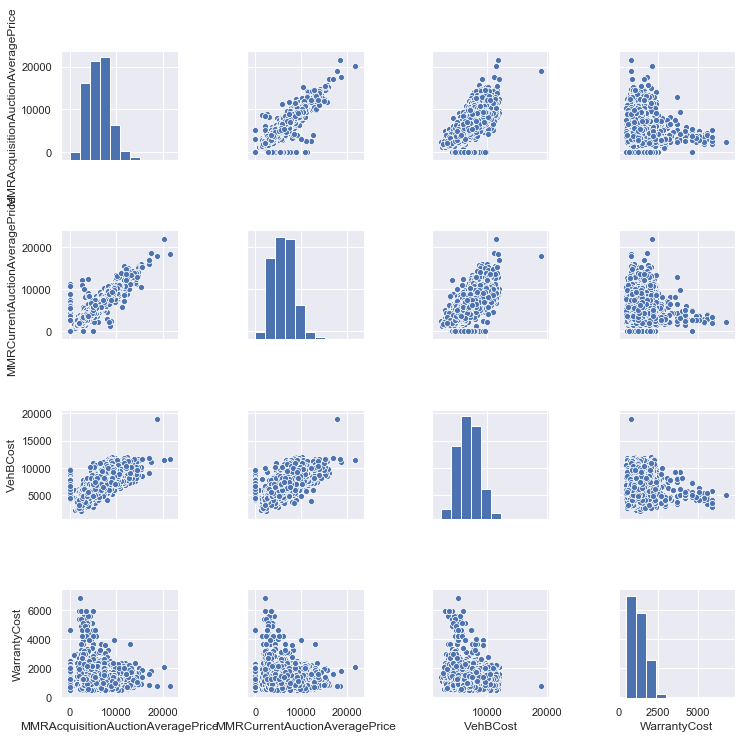

In [20]:
sns.pairplot(df[['MMRAcquisitionAuctionAveragePrice', 'MMRCurrentAuctionAveragePrice','VehBCost', 'WarrantyCost']])

Ako pogledamo odnos cene i troškova, vidimo da postoji tendencija da vozila niže cene imaju znatno veći trošak garancije, verovatno zbog toga što su i lošijeg kvaliteta. A što je vozilo skuplje to je i skuplji trošak akvizicije tog vozila.

## Priprema podataka

### Nedostajuće vrednosti 


In [21]:
df.isnull().sum()/df.shape[0]

PurchDate                            0.000000
Auction                              0.561194
VehYear                              0.000000
VehicleAge                           0.000000
Make                                 0.000000
Model                                0.000000
Trim                                 0.034128
SubModel                             0.000000
Color                                0.000000
Transmission                         0.000000
WheelTypeID                          0.041630
WheelType                            0.049868
VehOdo                               0.000000
Nationality                          0.000147
Size                                 0.000147
TopThreeAmericanName                 0.000147
MMRAcquisitionAuctionAveragePrice    0.000147
MMRAcquisitionAuctionCleanPrice      0.000147
MMRAcquisitionRetailAveragePrice     0.000147
MMRAcquisitonRetailCleanPrice        0.000147
MMRCurrentAuctionAveragePrice        0.003089
MMRCurrentAuctionCleanPrice       

In [22]:
df.isnull().sum().sum()

23345

In [23]:
df["VNZIP1"].value_counts()

32824    339
27542    319
75236    226
74135    214
80022    205
85226    187
28273    181
33619    178
29697    176
75050    173
85040    170
95673    162
77041    152
76040    148
29532    145
78754    131
91752    129
78219    123
28625    116
73108    113
21075    111
80011    111
30272    106
32124    100
92807     96
77086     95
78227     93
34761     87
85009     84
32219     79
92337     78
45005     74
80229     70
80817     68
30212     67
84104     64
33809     60
77061     59
94544     54
64161     53
27407     52
20166     52
50111     51
37210     51
85353     51
85284     50
22403     46
19440     46
35004     43
22801     42
75061     37
29461     34
89165     33
76063     33
30331     32
37771     30
92504     29
35613     28
29070     27
37122     27
87105     27
92057     27
90045     26
47129     26
8505      26
33411     25
32750     22
26431     22
42104     21
37421     20
34203     19
77073     18
75020     18
38118     18
30120     17
83716     16
30315     16

In [24]:
df['VNZIP1'].nunique()

143

In [25]:
pd.crosstab(df['PRIMEUNIT'], df['IsBadBuy']).apply(lambda r: r/r.sum(), axis=1)

IsBadBuy,0,1
PRIMEUNIT,,
NO,0.972222,0.027778
YES,0.866667,0.133333


In [26]:
pd.crosstab(df['AUCGUART'], df['IsBadBuy']).apply(lambda r: r/r.sum(), axis=1)

IsBadBuy,0,1
AUCGUART,,
GREEN,0.969325,0.030675
RED,0.923077,0.076923


In [27]:
pd.crosstab(df['VNST'], df['IsBadBuy']).apply(lambda r: r/r.sum(), axis=1)

IsBadBuy,0,1
VNST,,
FL,0.886063,0.113937
VA,0.810811,0.189189


Vidimo da nekoliko kolona - Auction, PRIMEUNIT, AUCGUART i VNST, ima veliki procenat nedostajucih vrednosti. Popunjavanjem ovih kolona bismo ugrozili tačnost modela, te ih je bolje izbaciti. Državu postoji mogućnost mapirati u okruge preko zip coda, međutim vidimo da postoji veliki broj različitih okruga, te je pitanje da li bi takav podatak bio informativan. 
Takođe biće izbačen i WheelTypeID jer nosi istu informaciju kao WheelType.

In [28]:
df.drop(['PRIMEUNIT', 'VNST', 'AUCGUART', 'Auction', 'WheelTypeID'], axis=1, inplace=True)

Ostale vrednosti ćemo popuniti na odgovarajući način. Kategoričke ćemo popuniti modusom. Numeričke u zavisnosti od toga da li imaju ili nemaju normalnu raspodelu popunjavamo srednjom vrednošću ili medijanom.

In [29]:
na_cat = ['Trim', 'WheelType', 'Nationality', 'Size','TopThreeAmericanName']

for cat in na_cat:
    df[cat] = df[cat].fillna(df[cat].mode()[0])

In [30]:
num_na = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 
          'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 
          'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']

In [31]:
df[num_na].describe()

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice
count,6797.000000,6797.000000,6797.000000,6797.000000,6777.000000,6777.000000,6777.000000,6777.000000
mean,6153.684125,7405.387524,8517.821539,9880.576431,6152.180906,7418.757710,8786.704146,10168.581231
std,2465.206950,2731.341954,3145.988442,3383.682106,2431.564892,2682.628698,3088.425185,3305.444219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4273.000000,5415.000000,6301.000000,7493.000000,4274.000000,5434.000000,6531.000000,7810.000000
50%,6148.000000,7353.000000,8473.000000,9821.000000,6091.000000,7352.000000,8760.000000,10114.000000
75%,7774.000000,9014.000000,10626.000000,12083.000000,7720.000000,9014.000000,10884.000000,12308.000000
max,21611.000000,24015.000000,23840.000000,26436.000000,21837.000000,25847.000000,24084.000000,28415.000000


Svim varijablama su medijana i srednja vrednost približno jednake, a i ako se prisetimo grafika koje smo ranije crtali, možemo reći da ovi atributi imaju normalnu raspodelu te ih možemo popuniti srednjom vrednošću.

In [32]:
for num in num_na:
    df[num] = df[num].fillna(df[num].mean())

In [33]:
df.isnull().sum()

PurchDate                            0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                               0
VehBCost                             0
IsOnlineSale             

Nema više nedostajućih vredosti tako da možemo nastaviti sa pripremom podataka. Za početak ćemo izbaciti neinformativne podatke, koji neće imati moć u predikciji. Pre svega se to odnosi na id kupca jer nemamo više informacija o njemu, kao i na zip kod iz gore pomenutih razloga. Takođe, tokom eksploratorne analize je uočeno da boja nema velikog značaja na krajnji ishod i da procentualno nema velike razlike između loših i dobrih kupovina. Zbog toga ćemo i boju izbaciti iz dalje analize. Datum kada je vozilo kupljeno na aukciji takođe nije od značaja za predikciju, a s obzirom da već imamo koliko je staro vozilo možemo izbaciti i njegovu godinu proizvodnje.

In [34]:
df.drop(columns = ['BYRNO', 'VNZIP1', 'Color', 'PurchDate', 'VehYear'], axis = 1, inplace = True)

### Kreiranje novih atributa

In [35]:
df.columns

Index(['VehicleAge', 'Make', 'Model', 'Trim', 'SubModel', 'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'IsBadBuy'], dtype='object')

In [36]:
df.Model.unique()

array(['STRATUS V6', 'NEON', 'FOCUS', 'GALANT 4C', '1500 RAM PICKUP 2WD',
       'FORENZA', 'DURANGO 2WD V8', 'F150 PICKUP 2WD V8', '300',
       'ALERO 4C', 'OPTIMA 4C', 'RANGER PICKUP 2WD V6', 'TAURUS',
       'IMPALA', 'EXPEDITION 2WD V8', 'MAZDA3', 'STRATUS 4C', 'COBALT',
       'PACIFICA FWD', 'SUNFIRE', 'PT CRUISER', 'GRAND PRIX', 'COROLLA',
       'SABLE', 'ELANTRA', 'AVENGER 4C', 'ENDEAVOR AWD', 'G6 V6',
       'SPECTRA', 'MUSTANG V6 4.0L V6 E', 'CHARGER V6 2.7L V6 M',
       'SONATA V6 2.7L V6 MP', 'IMPALA 3.5L V6 SFI',
       'TRAILBLAZER 4WD 6C 4', 'STRATUS 4C 2.4L I4 S',
       'SONATA V6 3.3L V6 MP', 'ELANTRA 2.0L I4 MPI',
       'STRATUS 4C 2.4L I4 M', 'SENTRA 2.5L I-4 EFI',
       'DURANGO 4WD V8 5.7L', 'SONATA 4C 2.4L I4 MP',
       'PT CRUISER 2.4L I4 S', 'ACCORD 4C', 'WINDSTAR FWD V6', 'LANCER',
       'ACCORD V6', 'COOPER', 'FREESTAR FWD V6', 'TRAILBLAZER EXT 4WD',
       'MAXIMA', 'ACCENT', 'EXPLORER 4WD V6', 'SEBRING 4C', 'CHARGER V6',
       'CALIBER', 'GALANT V6'

Analizom atributa Model smo došli do zaključka da je moguće izvući 2 dodatna atributa koja će biti informativnija od samog naziva modela, a to su tip motora i vrstu pogona.

In [37]:
def motor_type(model):
    if('V6' in model):
        return 'V6'
    elif('V8' in model):
        return 'V8'
    else:
        return 'other'

In [38]:
def wheel_drive(model):
    if('2WD' in model):
        return '2WD'
    elif('4WD' in model):
        return '4WD'
    elif('AWD' in model):
        return 'AWD'
    elif('FWD' in model):
        return 'FWD'
    elif('RWD' in model):
        return 'RWD'
    else:
        return 'other'

In [39]:
df['MotorType'] = df['Model'].apply(lambda x: motor_type(x))

In [40]:
df['WheelDrive'] = df['Model'].apply(lambda x: wheel_drive(x))

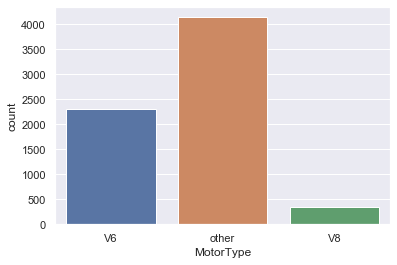

In [41]:
sns.countplot(data=df, x='MotorType')

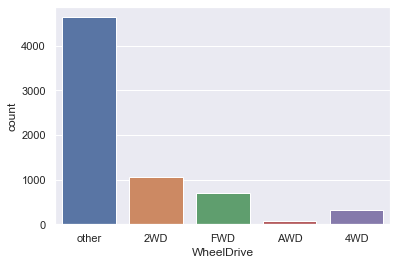

In [42]:
sns.countplot(data=df, x='WheelDrive')

Veliki broj vozila nema neke od definisanih tipova, međutim to neće predstavljati problem jer svakako kako bismo kasnije izbegli dummy variable trap je potrebno da izbacimo neku od dummy kolona, te će nam ostati informativni podaci.

In [43]:
df.SubModel.unique()

array(['4D SEDAN SXT FFV', '4D SEDAN', '2D COUPE ZX3', '4D SEDAN ES',
       'QUAD CAB 4.7L SLT', '4D SUV 4.7L ST', 'CREW CAB 5.4L KING RANCH',
       'QUAD CAB 5.7L', '4D SEDAN GL1', 'REG CAB 3.7L',
       '2D EXT CAB 3.0L EDGE', '4D SEDAN SEL FFV', '4D SEDAN ZX4 SE',
       '4D SEDAN LT 3.5L', '4D SUV 4.6L XLT', '5D SEDAN GS',
       '4D SPORT TOURING', '2D COUPE SE', '4D SEDAN ZX4', '4D SEDAN CE',
       '4D SEDAN GS', '4D SUV 4.6L XLS', '4D SPORT UTILITY LS',
       '4D SEDAN LS', '4D SEDAN LT 3.9L', '4D SEDAN EX',
       'EXT CAB 4.6L FX2 SPORT', '2D COUPE', '4D SEDAN 2.7L',
       '4D SUV 4.2L LS', '4D SEDAN SE-R', '4D SUV 5.7L SLT',
       '4D SEDAN EX AUTO', '4D SPORT', '4D PASSENGER 3.8L SEL',
       '2D COUPE EX AUTO', 'PASSENGER 3.9L', 'QUAD CAB 3.7L',
       '4D SEDAN GXE', '2D COUPE GS', '4D SUV 4.0L FFV XLT',
       '4D SEDAN TOURING', '4D WAGON', 'WAGON 3.5L SXT',
       '2D QUAD COUPE LEVEL 3', '4D SEDAN SEL', '4D SUV 2.2L LS',
       '4D SPORT UTILITY 2.5X', '4D SEDAN 

Iz SubModela možemo da izvučemo informaciju o tome koliko vrata ima vozilo.

In [44]:
def doors_num(submodel):
    if('2D' in submodel):
        return '2D'
    elif('4D' in submodel):
        return '4D'
    elif('5D' in submodel):
        return '5D'
    else:
        return 'other'

In [45]:
df['Doors'] = df['SubModel'].apply(lambda x: doors_num(x))

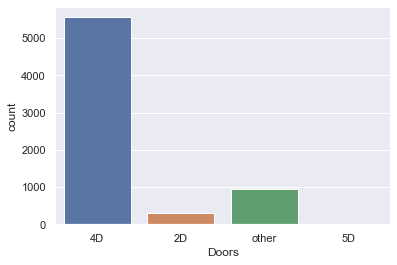

In [46]:
sns.countplot(data=df, x='Doors')

Primećujemo su informacije o vrednosti zapremine motora evidentirane u okviru atributa Model ili SubModel, a kod nekih se ova informacija nalazi na oba mesta. Eksperimentisali smo sa uključivanjem informacije o zapremini motora u model, međutim veliki broj nedostajućih vrednosti (do 50%) je uticao na odluku da taj atribut ipak ne uzememo u razmatranje.

In [47]:
# import re
# def engine_volume(model,submodel):
#     volume_m = re.search("[0-9][.][0-9]L",model)
#     volume_sm = re.search("[0-9][.][0-9]L",submodel)
#     if volume_m:
#         return float(volume_m[0][:-1])
#     elif volume_sm:
#         return float(volume_sm[0][:-1])
#     else:
#         return volume_m

In [48]:
# df['EngineVolume'] = df.apply(lambda x: engine_volume(x.Model,x.SubModel), axis=1)

In [49]:
# df['EngineVolume'].isna().sum()/df.shape[0]

In [50]:
# pd.crosstab(df['IsBadBuy'], df['EngineVolume'].isna()).apply(lambda r: r/r.sum(), axis = 1)

In [51]:
# df['EngineVolume'].describe()

In [52]:
# df['EngineVolume'] = df['EngineVolume'].fillna(df['EngineVolume'].mean())

In [53]:
df.drop(['Model', 'SubModel'], axis=1, inplace=True)

### Kategorički podaci


In [54]:
df.columns

Index(['VehicleAge', 'Make', 'Trim', 'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'IsBadBuy', 'MotorType', 'WheelDrive', 'Doors'], dtype='object')

Prvo ćemo atribute koji mogu imati poredak pretvoriti u numeričke pomoću rečnika, a onda ćemo za one koji mogu biti informativni a nominalni su, napraviti dummy varijable.

In [55]:
df['Trim'].unique()

array(['SXT', 'ZX3', 'ES', 'ST', 'Bas', 'Lar', 'GL', 'EX', 'Edg', 'SEL',
       'ZX4', 'LT', 'XLT', 's', 'Tou', 'SE', 'CE', 'GS', 'XLS', 'GLS',
       'LS', 'XL', 'Lim', 'SE-', 'SLT', 'S', 'Nor', 'GLE', '3', 'X', '2',
       'LX', 'SES', 'eL', 'SLE', 'Spo', 'Ren', 'LE', 'RT', '150', 'XE',
       'Max', 'GT', 'ZTS', 'Edd', 'CX', 'Adv', 'ZX5', 'i', 'Pre', 'Z71',
       'W/T', 'Cla', '1', 'R/T', 'GTP', 'Ove', 'Cus', 'ZTW', 'Exe', 'LW3',
       'Pro', 'STX', 'SX', 'SV6', 'CXS', 'L30', 'DX', 'SL1', 'L20', 'LXi',
       'Spy', 'LTZ', 'SC2', 'VP', 'SR5', 'ZXW', 'Plu', 'SL2', 'SL', 'C',
       'DS', 'Her', 'Hig', 'XRS', 'DE', 'SS', 'CXL', 'Maz', 'GTC', 'FX4',
       'SVT', 'Kin', 'Lux', 'Spe', 'Val', 'Z24', 'eC', 'L10', 'Sta',
       'GXE', 'LW2', 'JLS', 'ZX2'], dtype=object)

In [56]:
pd.crosstab(df['Trim'], df['IsBadBuy']).apply(lambda r: r/r.sum(), axis=1)

IsBadBuy,0,1
Trim,,
1,1.000000,0.000000
150,0.884615,0.115385
2,0.837838,0.162162
3,0.800000,0.200000
Adv,0.818182,0.181818
Bas,0.874031,0.125969
C,0.500000,0.500000
CE,0.789474,0.210526
CX,0.900000,0.100000


Pošto se Trim odnosi na dodatne karakteristike koji neki automobil ima, a koje su specifične za svakog proizvođača ne možemo ih porediti lako, pritom pravljenje dummy varijable za ovaj broj jedinstvenih vrednosti nije najbolja opcija, isključićemo trim iz dalje analize.

In [57]:
df.drop(['Trim'], axis=1, inplace=True)

#### Ordinalni atributi

In [58]:
door_map_dict = {
    'other' : 0,
    '2D' : 1,
    '4D' : 2,
    '5D': 3
}
df['Doors'] = df['Doors'].replace(door_map_dict)

In [59]:
df['Transmission'].unique()

array(['AUTO', 'MANUAL'], dtype=object)

In [60]:
df['Transmission'].value_counts()

AUTO      6547
MANUAL     251
Name: Transmission, dtype: int64

In [61]:
transmission_map_dict = {
    'MANUAL' : 0,
    'AUTO' :1
}

In [62]:
df['AutoTransmission'] = df['Transmission'].replace(transmission_map_dict)
df.drop(['Transmission'], axis=1, inplace=True)

In [63]:
df['WheelType'].unique()

array(['Covers', 'Alloy'], dtype=object)

In [64]:
df['WheelType'].value_counts()

Alloy     3715
Covers    3083
Name: WheelType, dtype: int64

In [65]:
wheel_map_dict = {
    'Covers' : 0, 
    'Alloy' :1  
}
df['WheelTypeAlloy'] = df['WheelType'].replace(wheel_map_dict)
df.drop(['WheelType'], axis=1, inplace=True)

In [66]:
df['Size'].unique()

array(['MEDIUM', 'COMPACT', 'LARGE TRUCK', 'MEDIUM SUV', 'SPECIALTY',
       'SMALL TRUCK', 'LARGE', 'LARGE SUV', 'CROSSOVER', 'SPORTS', 'VAN',
       'SMALL SUV'], dtype=object)

In [67]:
size_map_dict = {
    'COMPACT' : 0, 
    'SPORTS' :1,
    'CROSSOVER' :2,
    'MEDIUM' : 2,
    'SMALL SUV' :3,
    'MEDIUM SUV' :4,
    'LARGE' : 5,
    'LARGE SUV' :6,
    'VAN':7,
    'SPECIALTY' :8,
    'SMALL TRUCK': 8,
    'LARGE TRUCK' :9,
}
df['Size'] = df['Size'].replace(size_map_dict)

#### Nominalni atributi


In [68]:
df = pd.get_dummies(df, columns=['Make','WheelDrive','MotorType','Nationality', 'TopThreeAmericanName'], prefix = ['Brand','WheelD','Motor','Nationality', 'Top3'])
df.head()

,VehicleAge,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy,Doors,AutoTransmission,WheelTypeAlloy,Brand_ACURA,Brand_BUICK,Brand_CADILLAC,Brand_CHEVROLET,Brand_CHRYSLER,Brand_DODGE,Brand_FORD,Brand_GMC,Brand_HONDA,Brand_HUMMER,Brand_HYUNDAI,Brand_INFINITI,Brand_ISUZU,Brand_JEEP,Brand_KIA,Brand_LEXUS,Brand_LINCOLN,Brand_MAZDA,Brand_MERCURY,Brand_MINI,Brand_MITSUBISHI,Brand_NISSAN,Brand_OLDSMOBILE,Brand_PLYMOUTH,Brand_PONTIAC,Brand_SATURN,Brand_SCION,Brand_SUBARU,Brand_SUZUKI,Brand_TOYOTA,Brand_VOLKSWAGEN,Brand_VOLVO,WheelD_2WD,WheelD_4WD,WheelD_AWD,WheelD_FWD,WheelD_other,Motor_V6,Motor_V8,Motor_other,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Top3_CHRYSLER,Top3_FORD,Top3_GM,Top3_OTHER
RefId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,73807,2,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0
2,5,65617,0,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630,0,2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
3,4,69367,0,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
4,5,81054,2,3901.0,4908.0,6706.0,8577.0,4709.0,5827.0,8149.0,9451.0,5600.0,0,594,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5,5,76173,9,6407.0,8051.0,10378.0,12443.0,7159.0,8934.0,11135.0,12560.0,8800.0,0,920,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0


In [69]:
df.drop(['Brand_ISUZU','WheelD_other','Motor_other','Nationality_OTHER', 'Top3_OTHER'],axis = 1, inplace = True)

In [70]:
df.shape

(6798, 61)

In [71]:
df.columns

Index(['VehicleAge', 'VehOdo', 'Size', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'IsBadBuy', 'Doors', 'AutoTransmission', 'WheelTypeAlloy', 'Brand_ACURA', 'Brand_BUICK', 'Brand_CADILLAC', 'Brand_CHEVROLET', 'Brand_CHRYSLER', 'Brand_DODGE', 'Brand_FORD', 'Brand_GMC', 'Brand_HONDA', 'Brand_HUMMER', 'Brand_HYUNDAI', 'Brand_INFINITI', 'Brand_JEEP', 'Brand_KIA', 'Brand_LEXUS', 'Brand_LINCOLN', 'Brand_MAZDA', 'Brand_MERCURY', 'Brand_MINI', 'Brand_MITSUBISHI', 'Brand_NISSAN', 'Brand_OLDSMOBILE', 'Brand_PLYMOUTH', 'Brand_PONTIAC', 'Brand_SATURN', 'Brand_SCION', 'Brand_SUBARU', 'Brand_SUZUKI', 'Brand_TOYOTA', 'Brand_VOLKSWAGEN', 'Brand_VOLVO', 'WheelD_2WD', 'WheelD_4WD', 'WheelD_AWD', 'WheelD_FWD', 'Motor_V6', 'Motor_V8',
       '

### Izuzeci

In [72]:
columns = ['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
           'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 
           'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
           'MMRCurrentRetailCleanPrice', 'VehBCost', 'WarrantyCost']

In [73]:
df.shape

(6798, 61)

In [74]:
from scipy import stats

z = np.abs(stats.zscore(df[columns]))
df = df[(z < 3).all(axis=1)]
df.shape

(6609, 61)

## Podela na train i test 

In [75]:
X,y = df.drop('IsBadBuy',1), df['IsBadBuy']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Skaliranje

S obzirom da smo izbacili outlier-e, možemo pristupiti skaliranju. Za to koristimo MinMax Scaler.

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.375     , 0.65421426, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.375     , 0.68654855, 0.77777778, ..., 1.        , 0.        ,
        0.        ],
       [0.125     , 0.57416819, 0.77777778, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 0.77130881, 0.55555556, ..., 0.        , 0.        ,
        1.        ],
       [0.375     , 0.70639086, 0.22222222, ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.76284228, 0.22222222, ..., 0.        , 0.        ,
        1.        ]])

## Balansiranje

Zbog nebalansiranoste klase koju predviđamo potrebno je izvršiti balansiranje. U ovom trenutku nije sigurno da li je bolje raditi undersample ili oversample, te ćemo probati oba i na osnovu rezultata doneti odluku.

In [78]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=0)
X_train_us, y_train_us = under_sampler.fit_resample(X_train, y_train)

In [79]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_os, y_train_os = sm.fit_sample(X_train, y_train.ravel())

In [80]:
print(f"Bez balansiranja: {X_train.shape}")
print(f"Undersample: {X_train_us.shape}")
print(f"Oversample: {X_train_os.shape}")

Bez balansiranja: (4626, 60)
Undersample: (1186, 60)
Oversample: (8066, 60)


## Klasifikacija

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score

def eval_metrics(y_test, y_pred, y_pred_proba, model):    
    print(str(model).split('(')[0])
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('Roc-auc: ', roc_auc_score(y_test, y_pred_proba))

In [82]:
def cross_validate(metrics, X_ev, y_ev, model):
    print(str(model).split('(')[0])
    for metric in metrics:
        print(metric.capitalize(),': ', cross_val_score(model, X_ev, y_ev, cv=10, scoring=metric).mean(), 
              '+/-', cross_val_score(model, X_ev, y_ev, cv=10, scoring=metric).std())

In [83]:
metrics = ['accuracy', 'precision', 'recall', 'roc_auc']

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### Poređenje rezultata modela sa nebalansiranim i balansiranim podacima

In [85]:
from sklearn.linear_model import LogisticRegression

model_lr_raw = LogisticRegression()
model_lr_raw.fit(X_train, y_train)

model_lr_us = LogisticRegression()
model_lr_us.fit(X_train_us, y_train_us)

model_lr_os = LogisticRegression()
model_lr_os.fit(X_train_os, y_train_os)

LogisticRegression()

In [86]:
y_pred_raw = model_lr_raw.predict(X_test)
y_pred_us = model_lr_us.predict(X_test)
y_pred_os = model_lr_os.predict(X_test)

In [87]:
y_pred_proba_raw = model_lr_raw.predict_proba(X_test)
y_pred_proba_us = model_lr_us.predict_proba(X_test)
y_pred_proba_os = model_lr_os.predict_proba(X_test)

#### Nebalansirani podaci

In [89]:
eval_metrics(y_test, y_pred_raw, y_pred_proba_raw[:,1], model_lr_raw)

LogisticRegression
Accuracy:  0.875441250630358
Precision:  0.0
Recall:  0.0
Roc-auc:  0.6609774819682567


#### Undersample

In [90]:
eval_metrics(y_test, y_pred_us, y_pred_proba_us[:,1], model_lr_us)

LogisticRegression
Accuracy:  0.6101865859808371
Precision:  0.18518518518518517
Recall:  0.6300813008130082
Roc-auc:  0.6563999232393015


#### Oversample

In [91]:
eval_metrics(y_test, y_pred_os, y_pred_proba_os[:,1], model_lr_os)

LogisticRegression
Accuracy:  0.6227937468482098
Precision:  0.18858560794044665
Recall:  0.6178861788617886
Roc-auc:  0.6527210263467056


Zbog nebalansiranosti podataka, model je zaključio da je mnogo bolje da predvidi da nijedan automobil nije kick i da će tako postići veću tačnost. Ipak, nemamo nijednog tp, te su nam odziv i preciznost nula. S obzirom da je nama bitnije da smanjimo false negative grešku, kako ne bismo kupili automobil koji je kick, tu meru ćemo optimizovati i zbog toga biramo undersample.

In [92]:
X_train, y_train = X_train_us, y_train_us

## Treniranje modela sa podrazumevanim parametrima

Treniraćemo 4 modela: Logističku regresiju, KNN, Random Forest i Gradient Boosting. Na taj način ćemo probati više grupa algoritama.

### Logistic Regression

In [93]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
cross_validate(metrics, X_train, y_train, model_lr)

LogisticRegression
Accuracy :  0.6307078763708873 +/- 0.027672148545289148
Precision :  0.6340432443258536 +/- 0.028612147641107102
Recall :  0.6205084745762712 +/- 0.05242852619607207
Roc_auc :  0.6763822656324812 +/- 0.027104380501106543


In [94]:
y_pred_lr = model_lr.predict(X_test)
y_pred_lr_proba = model_lr.predict_proba(X_test)
eval_metrics(y_test, y_pred_lr, y_pred_lr_proba[:,1], model_lr)

LogisticRegression
Accuracy:  0.6101865859808371
Precision:  0.18518518518518517
Recall:  0.6300813008130082
Roc-auc:  0.6563999232393015


In [95]:
confusion_matrix(y_test,y_pred_lr)

array([[1055,  682],
       [  91,  155]])

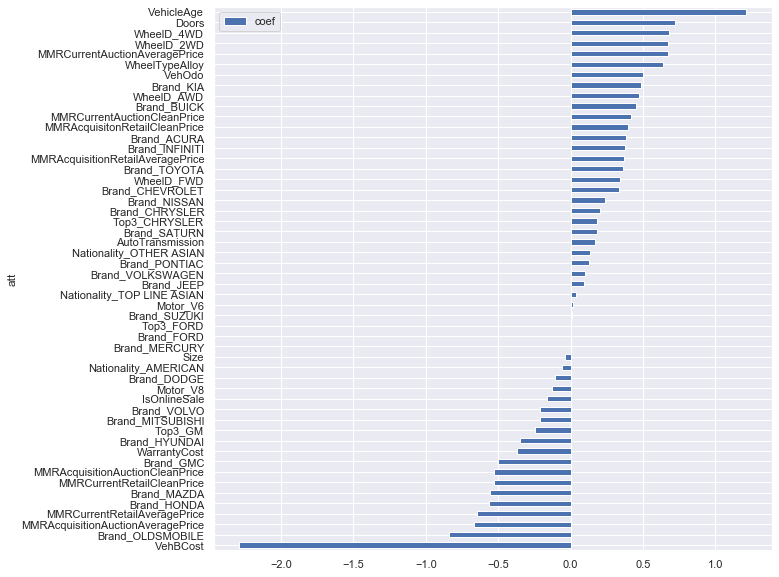

In [96]:
coef = pd.DataFrame({'att': X.columns, 'coef': model_lr.coef_[0]})
coef = coef.sort_values(by='coef').replace(0, np.nan).dropna()
coef.plot.barh(x='att', y='coef', figsize = (10,10))

### KNN

In [98]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
cross_validate(metrics, X_train, y_train, model_knn)

KNeighborsClassifier
Accuracy :  0.5834496510468593 +/- 0.041150087240643736
Precision :  0.5847799020820933 +/- 0.04353389067568403
Recall :  0.5835028248587572 +/- 0.057871725244016084
Roc_auc :  0.5992202911040889 +/- 0.04094539372514622


In [99]:
y_pred_knn = model_knn.predict(X_test)
y_pred_knn_proba = model_knn.predict_proba(X_test)
eval_metrics(y_test, y_pred_knn, y_pred_knn_proba[:,1], model_knn)

KNeighborsClassifier
Accuracy:  0.573373676248109
Precision:  0.1644295302013423
Recall:  0.5975609756097561
Roc-auc:  0.6031963342085925


In [100]:
confusion_matrix(y_test, y_pred_knn)

array([[990, 747],
       [ 99, 147]])

### Random Forest

In [101]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
cross_validate(metrics, X_train, y_train, model_rf)

RandomForestClassifier
Accuracy :  0.6180601053980915 +/- 0.025436628010300298
Precision :  0.6175163304973806 +/- 0.027415029319050623
Recall :  0.5970056497175141 +/- 0.05187954433646489
Roc_auc :  0.6387101407641482 +/- 0.01624953753579126


In [102]:
y_pred_rf = model_rf.predict(X_test)
y_pred_rf_proba = model_rf.predict_proba(X_test)
eval_metrics(y_test, y_pred_rf, y_pred_rf_proba[:,1], model_rf)

RandomForestClassifier
Accuracy:  0.59505799293999
Precision:  0.1765389082462253
Recall:  0.6178861788617886
Roc-auc:  0.6390644087788029


In [103]:
confusion_matrix(y_test, y_pred_rf)

array([[1028,  709],
       [  94,  152]])

### Gradient Boosting

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train,y_train)
cross_validate(metrics, X_train, y_train, model_gb)

GradientBoostingClassifier
Accuracy :  0.6096496225608886 +/- 0.02752303886144677
Precision :  0.6106766886254676 +/- 0.0172266112434152
Recall :  0.6036158192090395 +/- 0.08538644823664138
Roc_auc :  0.661376520157043 +/- 0.027443643987389594


In [105]:
y_pred_gb = model_gb.predict(X_test)
y_pred_gb_proba = model_gb.predict_proba(X_test)
eval_metrics(y_test, y_pred_gb, y_pred_gb_proba[:,1], model_gb)

GradientBoostingClassifier
Accuracy:  0.5955622793746849
Precision:  0.1789838337182448
Recall:  0.6300813008130082
Roc-auc:  0.6378018357040219


In [106]:
confusion_matrix(y_test,y_pred_gb)

array([[1026,  711],
       [  91,  155]])

Sa podrazumevanim parametrima Logistička regresija i Gradient Boosting daju najbolje rezultate, s tim da je Logistička za nijansu tačnija.

## Optimizacija parametara modela

### Logistic Regression

In [107]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats
params = {"penalty": ['l1', 'l2'],
          "C": scipy.stats.expon(scale=10)}

n_iter_search = 100

random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=params, n_iter=n_iter_search, cv=5, scoring='roc_auc')
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a214e6d90>,
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc')

In [108]:
random_search.best_params_

{'C': 1.3403641664256707, 'penalty': 'l2'}

In [109]:
best_lr = random_search.best_estimator_
best_lr.fit(X_train, y_train)
y_best_lr = best_lr.predict(X_test)
y_best_lr_proba = best_lr.predict_proba(X_test)

In [110]:
eval_metrics(y_test, y_best_lr, y_best_lr_proba[:,1], best_lr)

LogisticRegression
Accuracy:  0.6111951588502269
Precision:  0.18562874251497005
Recall:  0.6300813008130082
Roc-auc:  0.6560512237246725


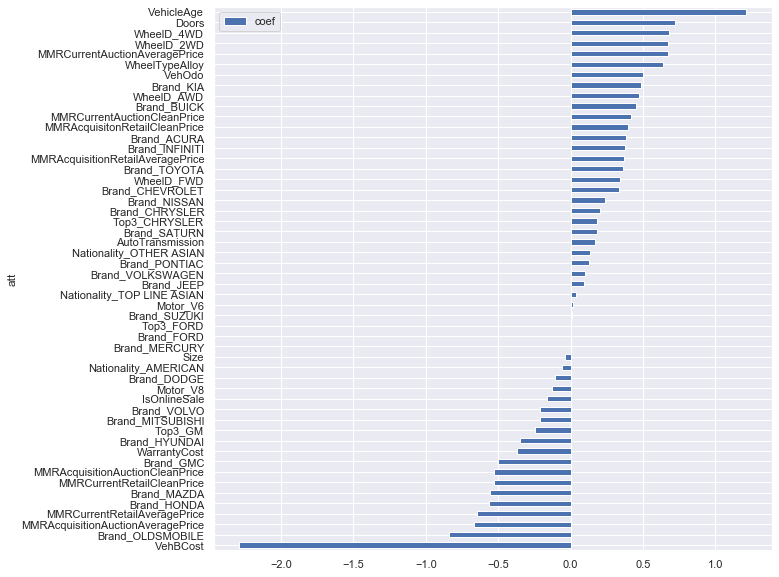

In [111]:
coef = pd.DataFrame({'att': X.columns, 'coef': model_lr.coef_[0]})
coef = coef.sort_values(by='coef').replace(0, np.nan).dropna()
from pylab import rcParams
coef.plot.barh(x='att', y='coef', figsize = (10,10))

### KNN

In [112]:
from sklearn.model_selection import GridSearchCV

params_k = [1, 3, 5, 7, 9, 11, 13]
param_dist = ['euclidean', 'manhattan', 'chebyshev']

params_knn = [{'n_neighbors': params_k, 'metric': param_dist}] 

grid_model_knn = GridSearchCV(model_knn, params_knn, cv=5, scoring='roc_auc')
grid_model_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan', 'chebyshev'],
                          'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}],
             scoring='roc_auc')

In [113]:
grid_model_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 9}

In [115]:
best_knn = grid_model_knn.best_estimator_
best_knn.fit(X_train,y_train)
y_best_knn = best_knn.predict(X_test)
y_best_knn_proba = best_knn.predict_proba(X_test)

In [116]:
eval_metrics(y_test, y_best_knn, y_best_knn_proba[:,1], best_knn)

KNeighborsClassifier
Accuracy:  0.594553706505295
Precision:  0.16943127962085308
Recall:  0.5813008130081301
Roc-auc:  0.6134572269729606


### Random Forest

In [117]:
tuned_parameters = {
    'min_samples_split': range(2,40,3),
    'max_depth': range(6,20,2),
    'n_estimators' : range(10,100,10)
}
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,scoring='roc_auc')
clf.fit(X_train, y_train)

clf.best_params_

{'max_depth': 8, 'min_samples_split': 32, 'n_estimators': 80}

In [118]:
rfc = clf.best_estimator_
rfc.fit(X_train, y_train)
y_best_rf = rfc.predict(X_test)
y_best_rf_proba= rfc.predict_proba(X_test)
eval_metrics(y_test, y_best_rf, y_best_rf_proba[:,1], rfc)

RandomForestClassifier
Accuracy:  0.6192637418053455
Precision:  0.18849449204406366
Recall:  0.6260162601626016
Roc-auc:  0.66331540690191


### Gradient Boosting

In [119]:
tuned_parameters = {
    'min_samples_split': range(2,40,3),
    'max_depth': range(6,20,2),
    'n_estimators' : range(10,100,10)
}
grid_model_gb = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv=5,scoring='roc_auc')
grid_model_gb.fit(X_train, y_train)

grid_model_gb.best_params_

{'max_depth': 6, 'min_samples_split': 8, 'n_estimators': 40}

In [120]:
best_gb= grid_model_gb.best_estimator_
best_gb.fit(X_train, y_train)
y_best_gb = best_gb.predict(X_test)
y_best_gb_proba = best_gb.predict_proba(X_test)
eval_metrics(y_test, y_best_gb, y_best_gb_proba[:,1], best_gb)

GradientBoostingClassifier
Accuracy:  0.6086737266767523
Precision:  0.18301435406698566
Recall:  0.6219512195121951
Roc-auc:  0.649679851720797


Sa optimalnim parametrima smo malo u globalu uspeli da popravimo rezultate, međutim oni su i dalje nezadovoljavajući. Pokušaćemo selekcijom atributa da postignemo bolje. I dalje, najbolje rezultate daje Logistička regresija.

## Feature Selection

In [121]:
X_test = pd.DataFrame(X_test,columns = X.columns)
X_train = pd.DataFrame(X_train, columns = X.columns)

Probaćemo različite pristupe za selekciju atributa i videćemo koji se pozazao kao najbolji. Od pristupa biće predstavljeni sledeći: Selekcija iz modela, Variance Threshold, Select K Best i Metoda obavijanja.

### Selekcija iz modela

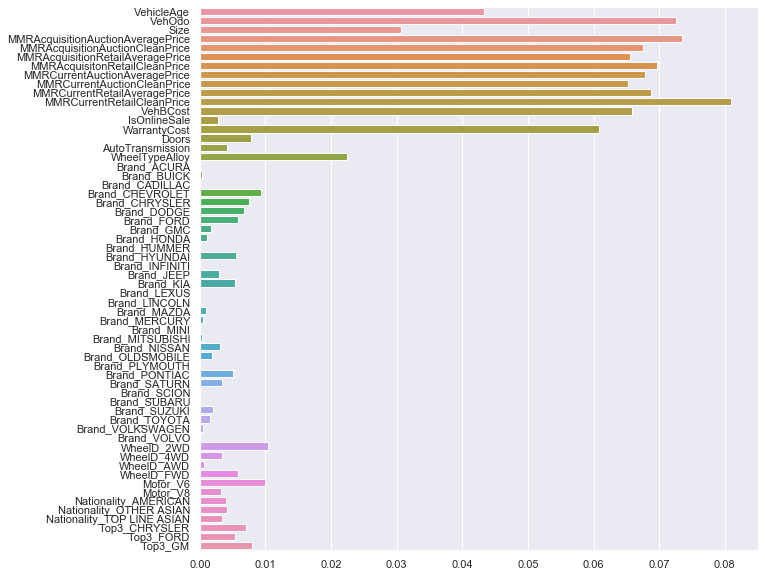

In [122]:
rf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
rf.feature_importances_

plt.figure(figsize=(10,10))
ax = sns.barplot(rf.feature_importances_, X.columns)

In [123]:
from sklearn.feature_selection import SelectFromModel
attributes = SelectFromModel(estimator=rf, threshold=0.005).fit(X_train, y_train)

X_train_reduced_rf = pd.DataFrame(attributes.transform(X_train), columns=X.columns[attributes.get_support()])
X_train_reduced_rf.shape

(1186, 27)

In [124]:
cols_rf = X_train_reduced_rf.columns
X_test_reduced_rf = X_test[cols_rf]
X_test_reduced_rf.head()

,VehicleAge,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost,Doors,WheelTypeAlloy,Brand_CHEVROLET,Brand_CHRYSLER,Brand_DODGE,Brand_FORD,Brand_KIA,Brand_PONTIAC,WheelD_2WD,Motor_V6,Nationality_OTHER ASIAN,Top3_CHRYSLER,Top3_FORD,Top3_GM
0,0.500,0.821407,0.222222,0.241902,0.295481,0.231669,0.274189,0.130923,0.141591,0.259297,0.274011,0.207906,0.229693,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.500,0.593037,0.555556,0.285117,0.324034,0.414804,0.441008,0.209809,0.224758,0.322640,0.347379,0.313142,0.587641,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.750,0.726031,0.000000,0.251679,0.257629,0.365864,0.362931,0.109726,0.120688,0.226333,0.230151,0.254620,0.420132,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.375,0.555466,0.222222,0.377370,0.404650,0.507355,0.497755,0.328429,0.333703,0.393735,0.406338,0.367043,0.132530,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.125,0.148063,0.000000,0.437677,0.443222,0.395749,0.398500,0.344306,0.320851,0.272911,0.267409,0.332136,0.062573,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Logistic Regression

In [125]:
best_lr.fit(X_train_reduced_rf,y_train)
y_rf_lr = best_lr.predict(X_test_reduced_rf)
y_rf_lr_proba = best_lr.predict_proba(X_test_reduced_rf)
eval_metrics(y_test, y_rf_lr, y_rf_lr_proba[:,1], best_lr)

LogisticRegression
Accuracy:  0.6091780131114473
Precision:  0.18170878459687123
Recall:  0.6138211382113821
Roc-auc:  0.6520142662566522


#### KNN

In [126]:
best_knn.fit(X_train_reduced_rf,y_train)
y_rf_knn = best_knn.predict(X_test_reduced_rf)
y_rf_knn_proba = best_knn.predict_proba(X_test_reduced_rf)
eval_metrics(y_test, y_rf_knn, y_rf_knn_proba[:,1], best_knn)

KNeighborsClassifier
Accuracy:  0.5748865355521936
Precision:  0.16870144284128746
Recall:  0.6178861788617886
Roc-auc:  0.6253083299399487


#### Random Forest

In [127]:
rfc.fit(X_train_reduced_rf,y_train)
y_rf_rf = rfc.predict(X_test_reduced_rf)
y_rf_rf_proba = rfc.predict_proba(X_test_reduced_rf)
eval_metrics(y_test, y_rf_rf, y_rf_rf_proba[:,1], rfc)

RandomForestClassifier
Accuracy:  0.5980837115481593
Precision:  0.18076477404403243
Recall:  0.6341463414634146
Roc-auc:  0.6563414166093301


#### Gradient Boosting

In [128]:
best_gb.fit(X_train_reduced_rf, y_train)
y_rf_gb = best_gb.predict(X_test_reduced_rf)
y_rf_gb_proba = best_gb.predict_proba(X_test_reduced_rf)
eval_metrics(y_test, y_rf_gb, y_rf_gb_proba[:,1], best_gb)

GradientBoostingClassifier
Accuracy:  0.5990922844175491
Precision:  0.18118466898954705
Recall:  0.6341463414634146
Roc-auc:  0.651676097935418


Selekcija iz modela je očekivano najviše popravila Random Forest, a broj atributa smo sveli na 27.

### Variance Threshold

In [129]:
from sklearn.feature_selection import VarianceThreshold

variance = VarianceThreshold(threshold=0.02)
variance.fit(X_train)

X_train_reduced_var = pd.DataFrame(variance.transform(X_train), columns=X.columns[variance.get_support()])
X_train_reduced_var.shape

(1186, 39)

In [130]:
cols_var = X_train_reduced_var.columns
X_test_reduced_var = X_test[cols_var]
X_test_reduced_var.head()

,VehicleAge,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,Doors,AutoTransmission,WheelTypeAlloy,Brand_CHEVROLET,Brand_CHRYSLER,Brand_DODGE,Brand_FORD,Brand_HYUNDAI,Brand_JEEP,Brand_KIA,Brand_NISSAN,Brand_PONTIAC,Brand_SATURN,Brand_SUZUKI,WheelD_2WD,WheelD_4WD,WheelD_FWD,Motor_V6,Motor_V8,Nationality_AMERICAN,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Top3_CHRYSLER,Top3_FORD,Top3_GM
0,0.500,0.821407,0.222222,0.241902,0.295481,0.231669,0.274189,0.130923,0.141591,0.259297,0.274011,0.207906,0.0,0.229693,0.666667,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.500,0.593037,0.555556,0.285117,0.324034,0.414804,0.441008,0.209809,0.224758,0.322640,0.347379,0.313142,1.0,0.587641,0.666667,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.750,0.726031,0.000000,0.251679,0.257629,0.365864,0.362931,0.109726,0.120688,0.226333,0.230151,0.254620,0.0,0.420132,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.375,0.555466,0.222222,0.377370,0.404650,0.507355,0.497755,0.328429,0.333703,0.393735,0.406338,0.367043,0.0,0.132530,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.125,0.148063,0.000000,0.437677,0.443222,0.395749,0.398500,0.344306,0.320851,0.272911,0.267409,0.332136,0.0,0.062573,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Logistic regression

In [131]:
best_lr.fit(X_train_reduced_var,y_train)
y_var_lr = best_lr.predict(X_test_reduced_var)
y_var_lr_proba = best_lr.predict_proba(X_test_reduced_var)
eval_metrics(y_test, y_var_lr, y_var_lr_proba[:,1], best_lr)

LogisticRegression
Accuracy:  0.605648008068583
Precision:  0.18396226415094338
Recall:  0.6341463414634146
Roc-auc:  0.6592105817431231


#### KNN

In [132]:
best_knn.fit(X_train_reduced_var,y_train)
y_var_knn = best_knn.predict(X_test_reduced_var)
y_var_knn_proba = best_knn.predict_proba(X_test_reduced_var)
eval_metrics(y_test, y_var_knn, y_var_knn_proba[:,1], best_knn)

KNeighborsClassifier
Accuracy:  0.5965708522440747
Precision:  0.17488262910798122
Recall:  0.6056910569105691
Roc-auc:  0.6223350230048068


#### Random Forest

In [133]:
rfc.fit(X_train_reduced_var,y_train)
y_var_rf = rfc.predict(X_test_reduced_var)
y_var_rf_proba = rfc.predict_proba(X_test_reduced_var)
eval_metrics(y_test, y_var_rf, y_var_rf_proba[:,1], rfc)

RandomForestClassifier
Accuracy:  0.6227937468482098
Precision:  0.19390243902439025
Recall:  0.6463414634146342
Roc-auc:  0.6619135880477975


#### Gradient Boosting

In [134]:
best_gb.fit(X_train_reduced_var, y_train)
y_var_gb = best_gb.predict(X_test_reduced_var)
y_var_gb_proba = best_gb.predict_proba(X_test_reduced_var)
eval_metrics(y_test, y_var_gb, y_var_gb_proba[:,1], best_gb)

GradientBoostingClassifier
Accuracy:  0.5920322743318205
Precision:  0.1760644418872267
Recall:  0.6219512195121951
Roc-auc:  0.6424671543779341


Variance Threshold je sa pragom 0.02 izbacio nešto manje atributa, te je ostalo njih 39, i ponovo je to najviše uticalo na Random Forest koji do sada ima najbolji rezultat.

### Select K Best

In [135]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selection = SelectKBest(k=20, score_func=mutual_info_classif)
selection.fit(X_train_reduced_var, y_train)

X_train_reduced_k_best = pd.DataFrame(selection.transform(X_train_reduced_var), columns=X_train_reduced_var.columns[selection.get_support()])
X_train_reduced_k_best.shape

(1186, 20)

In [136]:
cols_k_best = X_train_reduced_k_best.columns
X_test_reduced_k_best = X_test_reduced_var[cols_k_best]
X_test_reduced_k_best.head()

,VehicleAge,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost,AutoTransmission,WheelTypeAlloy,Brand_HYUNDAI,Brand_NISSAN,Brand_SATURN,Motor_V6,Nationality_AMERICAN,Nationality_OTHER ASIAN,Top3_FORD
0,0.500,0.222222,0.241902,0.295481,0.231669,0.274189,0.130923,0.259297,0.274011,0.207906,0.229693,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.500,0.555556,0.285117,0.324034,0.414804,0.441008,0.209809,0.322640,0.347379,0.313142,0.587641,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.750,0.000000,0.251679,0.257629,0.365864,0.362931,0.109726,0.226333,0.230151,0.254620,0.420132,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.375,0.222222,0.377370,0.404650,0.507355,0.497755,0.328429,0.393735,0.406338,0.367043,0.132530,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.125,0.000000,0.437677,0.443222,0.395749,0.398500,0.344306,0.272911,0.267409,0.332136,0.062573,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Logistic Regression

In [137]:
best_lr.fit(X_train_reduced_k_best,y_train)
y_k_best_lr = best_lr.predict(X_test_reduced_k_best)
y_k_best_lr_proba = best_lr.predict_proba(X_test_reduced_k_best)
eval_metrics(y_test, y_k_best_lr, y_k_best_lr_proba[:,1], best_lr)

LogisticRegression
Accuracy:  0.6167423096318709
Precision:  0.19693396226415094
Recall:  0.6788617886178862
Roc-auc:  0.6697136919555724


#### KNN

In [138]:
best_knn.fit(X_train_reduced_k_best,y_train)
y_k_best_knn = best_knn.predict(X_test_reduced_k_best)
y_k_best_knn_proba = best_knn.predict_proba(X_test_reduced_k_best)
eval_metrics(y_test, y_k_best_knn, y_k_best_knn_proba[:,1], best_knn)

KNeighborsClassifier
Accuracy:  0.5496722138174484
Precision:  0.16266944734098018
Recall:  0.6341463414634146
Roc-auc:  0.6171431446611528


#### Random Forest

In [139]:
rfc.fit(X_train_reduced_k_best,y_train)
y_k_best_rf = rfc.predict(X_test_reduced_k_best)
y_k_best_rf_proba = rfc.predict_proba(X_test_reduced_k_best)
eval_metrics(y_test, y_k_best_rf, y_k_best_rf_proba[:,1], rfc)

RandomForestClassifier
Accuracy:  0.6157337367624811
Precision:  0.19212410501193317
Recall:  0.6544715447154471
Roc-auc:  0.658070872591282


#### Gradient Boosting

In [140]:
best_gb.fit(X_train_reduced_k_best, y_train)
y_k_best_gb = best_gb.predict(X_test_reduced_k_best)
y_k_best_gb_proba = best_gb.predict_proba(X_test_reduced_k_best)
eval_metrics(y_test, y_k_best_gb, y_k_best_gb_proba[:,1], best_gb)

GradientBoostingClassifier
Accuracy:  0.6021180030257186
Precision:  0.18466898954703834
Recall:  0.6463414634146342
Roc-auc:  0.6448904989913458


Primenili smo Select K Best nad već smanjenim brojem atributa iz prethodnog koraka i za K prosledili 20. Ovih 20 atributa daju do sada najbolje rezultate za sve modele, dok je trenutno najbolja Logistička regresija.

### Metoda obavijanja

#### Logistic Regression

In [141]:
from sklearn.feature_selection import RFECV

model_as_lr = RFECV(estimator=best_lr, 
                 min_features_to_select=20, cv=10, step=1, 
                 scoring='recall')
model_as_lr.fit(X_train, y_train)

X_train_reduced_rfecv_lr = pd.DataFrame(model_as_lr.transform(X_train), columns=X.columns[model_as_lr.get_support()])
X_train_reduced_rfecv_lr.shape

(1186, 33)

In [142]:
cols_rfecv_lr = X_train_reduced_rfecv_lr.columns
X_test_reduced_rfecv_lr = X_test[cols_rfecv_lr]
X_test_reduced_rfecv_lr.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost,Doors,AutoTransmission,WheelTypeAlloy,Brand_ACURA,Brand_BUICK,Brand_DODGE,Brand_GMC,Brand_HONDA,Brand_HYUNDAI,Brand_INFINITI,Brand_KIA,Brand_MAZDA,Brand_NISSAN,Brand_OLDSMOBILE,Brand_TOYOTA,Brand_VOLVO,WheelD_2WD,WheelD_4WD,WheelD_AWD,WheelD_FWD,Top3_CHRYSLER
0,0.500,0.821407,0.241902,0.295481,0.231669,0.274189,0.130923,0.141591,0.259297,0.274011,0.207906,0.229693,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.500,0.593037,0.285117,0.324034,0.414804,0.441008,0.209809,0.224758,0.322640,0.347379,0.313142,0.587641,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.750,0.726031,0.251679,0.257629,0.365864,0.362931,0.109726,0.120688,0.226333,0.230151,0.254620,0.420132,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.375,0.555466,0.377370,0.404650,0.507355,0.497755,0.328429,0.333703,0.393735,0.406338,0.367043,0.132530,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.125,0.148063,0.437677,0.443222,0.395749,0.398500,0.344306,0.320851,0.272911,0.267409,0.332136,0.062573,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
best_lr.fit(X_train_reduced_rfecv_lr,y_train)
y_rfecv_lr = best_lr.predict(X_test_reduced_rfecv_lr)
y_rfecv_lr_proba = best_lr.predict_proba(X_test_reduced_rfecv_lr)
eval_metrics(y_test, y_rfecv_lr, y_rfecv_lr_proba[:,1], best_lr)

LogisticRegression
Accuracy:  0.6122037317196167
Precision:  0.18831942789034564
Recall:  0.6422764227642277
Roc-auc:  0.6612302306097327


#### Random Forest

In [144]:
from sklearn.feature_selection import RFECV

model_as_rf = RFECV(estimator=rfc, 
                 min_features_to_select=20, cv=10, step=1, 
                 scoring='recall')
model_as_rf.fit(X_train, y_train)

X_train_reduced_rfecv_rf = pd.DataFrame(model_as_rf.transform(X_train), columns=X.columns[model_as_rf.get_support()])
X_train_reduced_rfecv_rf.shape

(1186, 28)

In [145]:
cols_rfecv_rf = X_train_reduced_rfecv_rf.columns
X_test_reduced_rfecv_rf = X_test[cols_rfecv_rf]
X_test_reduced_rfecv_rf.head()

,VehicleAge,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost,Doors,AutoTransmission,WheelTypeAlloy,Brand_CHEVROLET,Brand_CHRYSLER,Brand_DODGE,Brand_HYUNDAI,Brand_KIA,Brand_OLDSMOBILE,WheelD_2WD,WheelD_4WD,Motor_V6,Motor_V8,Top3_FORD,Top3_GM
0,0.500,0.821407,0.222222,0.241902,0.295481,0.231669,0.274189,0.130923,0.141591,0.259297,0.274011,0.207906,0.229693,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.500,0.593037,0.555556,0.285117,0.324034,0.414804,0.441008,0.209809,0.224758,0.322640,0.347379,0.313142,0.587641,0.666667,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.750,0.726031,0.000000,0.251679,0.257629,0.365864,0.362931,0.109726,0.120688,0.226333,0.230151,0.254620,0.420132,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.375,0.555466,0.222222,0.377370,0.404650,0.507355,0.497755,0.328429,0.333703,0.393735,0.406338,0.367043,0.132530,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.125,0.148063,0.000000,0.437677,0.443222,0.395749,0.398500,0.344306,0.320851,0.272911,0.267409,0.332136,0.062573,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [145]:
rfc.fit(X_train_reduced_rfecv_rf,y_train)
y_rfecv_rf = rfc.predict(X_test_reduced_rfecv_rf)
y_rfecv_rf_proba = rfc.predict_proba(X_test_reduced_rfecv_rf)
eval_metrics(y_test, y_rfecv_rf, y_rfecv_rf_proba[:,1], rfc)

RandomForestClassifier
Accuracy:  0.6142208774583964
Precision:  0.18772563176895307
Recall:  0.6341463414634146
Roc-auc:  0.6227726525969923


#### Gradient Boosting

In [146]:
from sklearn.feature_selection import RFECV

model_as_gb = RFECV(estimator=best_gb, 
                 min_features_to_select=20, cv=10, step=1, 
                 scoring='recall')
model_as_gb.fit(X_train, y_train)

X_train_reduced_rfecv_gb = pd.DataFrame(model_as_gb.transform(X_train), columns=X.columns[model_as_gb.get_support()])
X_train_reduced_rfecv_gb.shape

(1186, 37)

In [147]:
cols_rfecv_gb = X_train_reduced_rfecv_gb.columns
X_test_reduced_rfecv_gb = X_test[cols_rfecv_gb]
X_test_reduced_rfecv_gb.head()

,VehicleAge,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,Doors,AutoTransmission,WheelTypeAlloy,Brand_CHEVROLET,Brand_CHRYSLER,Brand_DODGE,Brand_FORD,Brand_HYUNDAI,Brand_KIA,Brand_MITSUBISHI,Brand_NISSAN,Brand_OLDSMOBILE,Brand_PONTIAC,Brand_SATURN,WheelD_2WD,WheelD_4WD,WheelD_FWD,Motor_V6,Motor_V8,Nationality_AMERICAN,Nationality_TOP LINE ASIAN,Top3_FORD,Top3_GM
0,0.500,0.821407,0.222222,0.241902,0.295481,0.231669,0.274189,0.130923,0.141591,0.259297,0.274011,0.207906,0.0,0.229693,0.666667,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.500,0.593037,0.555556,0.285117,0.324034,0.414804,0.441008,0.209809,0.224758,0.322640,0.347379,0.313142,1.0,0.587641,0.666667,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.750,0.726031,0.000000,0.251679,0.257629,0.365864,0.362931,0.109726,0.120688,0.226333,0.230151,0.254620,0.0,0.420132,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.375,0.555466,0.222222,0.377370,0.404650,0.507355,0.497755,0.328429,0.333703,0.393735,0.406338,0.367043,0.0,0.132530,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.125,0.148063,0.000000,0.437677,0.443222,0.395749,0.398500,0.344306,0.320851,0.272911,0.267409,0.332136,0.0,0.062573,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [148]:
best_gb.fit(X_train_reduced_rfecv_gb, y_train)
y_rfecv_gb = best_gb.predict(X_test_reduced_rfecv_gb)
y_rfecv_gb_proba = best_gb.predict_proba(X_test_reduced_rfecv_gb)
eval_metrics(y_test, y_rfecv_gb, y_rfecv_gb_proba[:,1], best_gb)

GradientBoostingClassifier
Accuracy:  0.599596570852244
Precision:  0.1872146118721461
Recall:  0.6666666666666666
Roc-auc:  0.6283822682786413


Metodu obavijanja smo primenili na svakom algoritmu posebno i ova metoda je najviše uticala na Gradient Boosting. Ovim bi zaključili da u zavisnosti od modela, zavisi i koji bismo način selekcije primenili. Pošto je cilj optimizovati odziv, odlučili bismo se za Logističku regresiju i Select K Best selekciju atributa.